# Analysing Housing Dataset using Linear Regression

### Task

We would like to build a predictive model to help us determine the median value of homes in a metropolitan city.

### Input features
1) Crime_rate: per capita crime rate by town
2) Mountain_view: 1 if property has mountain views; 0 otherwise
3) Avg_room_num: average number of rooms per dwelling
4) Low_stat: % of lower income individuals in area

### Target variable
1) Value: Median value of homes in $1000's

A traditional linear regression model requires the target variable to be a continuous numeric variable. The features are not strictly required to be continuous numeric variables though. This means that even if some features are categorical, they can still be incorporated into a linear regression model, typically through encoding techniques like one-hot encoding or label encoding. The choice of encoding technique is dependent on the nature of the categorical variable.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Housing_dataset.csv')
df.head()

,Crime_rate,Mountain_view,Avg_room_num,Low_stat,Value
0,0.00632,No,6.575,4.98,24.0
1,0.02731,No,6.421,9.14,21.6
2,0.02729,No,7.185,4.03,34.7
3,0.03237,No,6.998,2.94,33.4
4,0.06905,No,7.147,5.33,36.2


## Exploratory Data Analysis

In [4]:
df.shape

(506, 5)

In [5]:
# Encoding categorical variable
df['Mountain_view'] = df['Mountain_view'].map({'No': 0, 'Yes': 1})

In [7]:
# Feature scaling
features = df.drop(columns = ['Mountain_view', 'Value'])

# Initialise StandardScaler
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns = features.columns)

scaled_df['Mountain_view'] = df['Mountain_view']
scaled_df['Value'] = df['Value']
scaled_df.head()

,Crime_rate,Avg_room_num,Low_stat,Mountain_view,Value
0,-0.419782,0.413672,-1.075562,0,24.0
1,-0.417339,0.194274,-0.492439,0,21.6
2,-0.417342,1.282714,-1.208727,0,34.7
3,-0.416750,1.016303,-1.361517,0,33.4
4,-0.412482,1.228577,-1.026501,0,36.2


In [11]:
scaled_df.corr()

,Crime_rate,Avg_room_num,Low_stat,Mountain_view,Value
Crime_rate,1.000000,-0.219247,0.455621,-0.055892,-0.388305
Avg_room_num,-0.219247,1.000000,-0.613808,0.091251,0.695360
Low_stat,0.455621,-0.613808,1.000000,-0.053929,-0.737663
Mountain_view,-0.055892,0.091251,-0.053929,1.000000,0.175260
Value,-0.388305,0.695360,-0.737663,0.175260,1.000000


<Figure size 200x200 with 0 Axes>

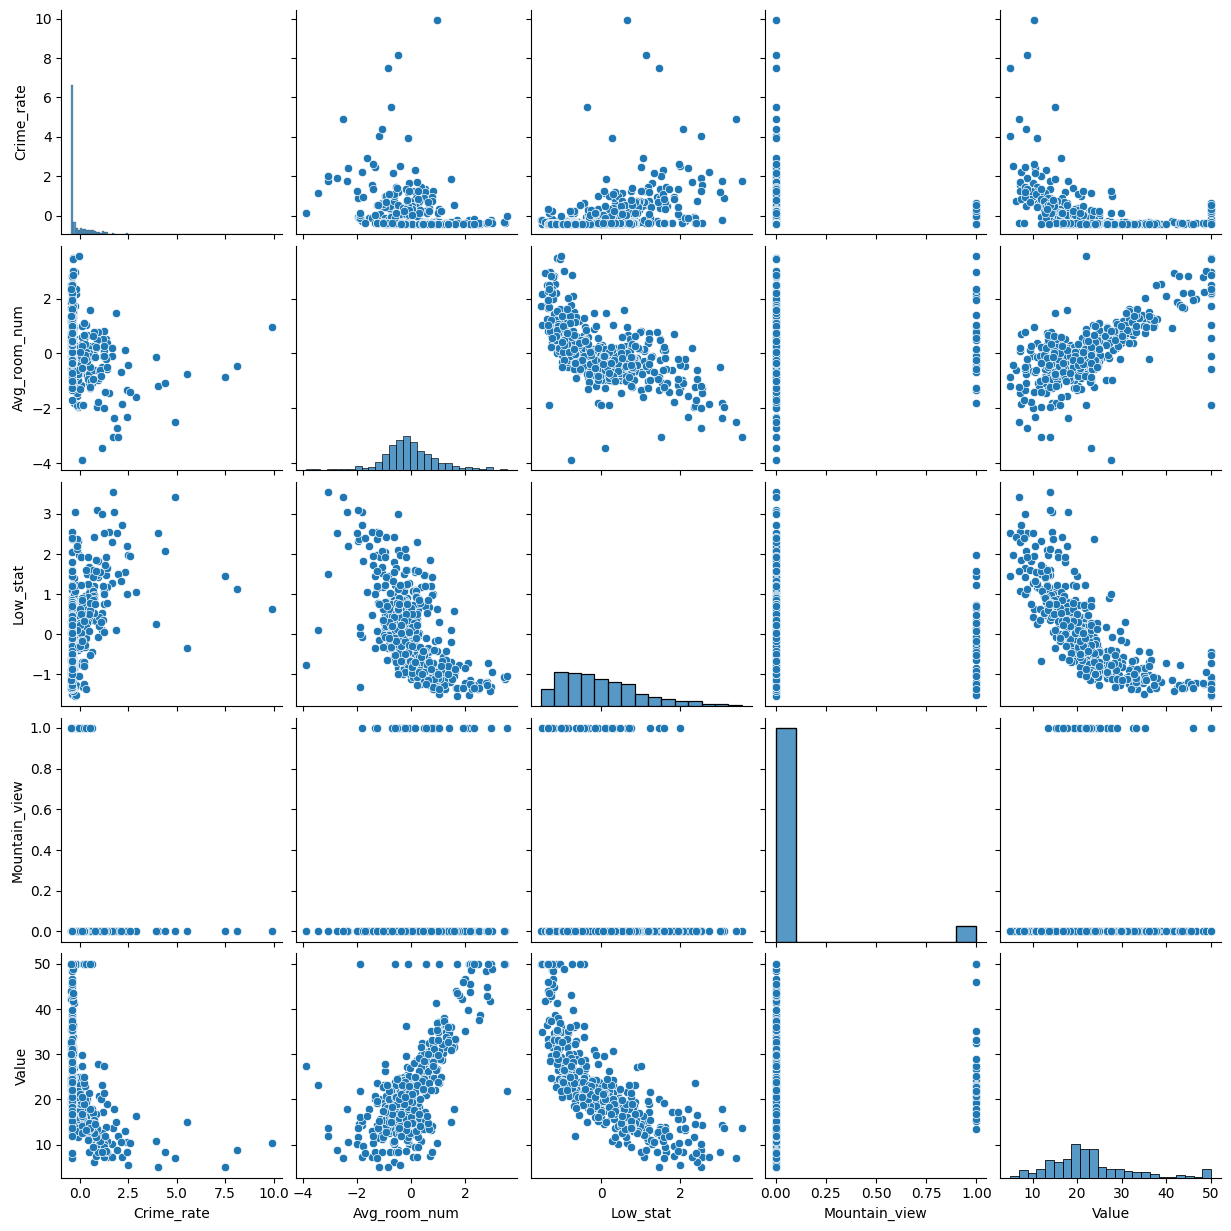

In [12]:
# Visualising varaible correlations
plt.figure(figsize=(2, 2))
sns.pairplot(scaled_df)
plt.show()

From the above plots, we can see some linear/approximately linear relationships between our features and target variable. It is important to check if we are meeting the model's assumption of linearity.

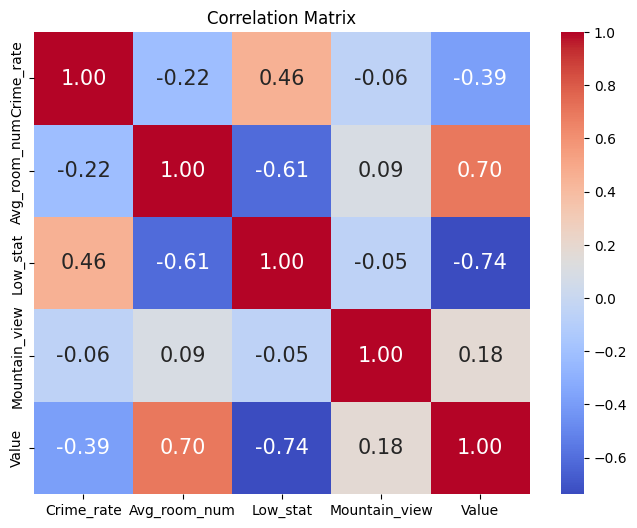

In [13]:
# Quantifying strength of the correlations seen above
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 15})
plt.title('Correlation Matrix')
plt.show()

From the above heatmap, we can see that there is a **strong negative correlation** between the percentage of lower income individuals in an area (`Low_stat`) and the target variable, `Value`. The scatterplot also showed that visually, a linear relationship exists between the two.  

We will start with building a simple linear regression model using the predictor, `Low_stat`.

## Building the Simple Linear Model

In [14]:
# Independent and dependent variables
X = scaled_df[['Low_stat']]
y = scaled_df['Value']

In [16]:
X.shape, y.shape

((506, 1), (506,))

In [17]:
# Split the data into training (80%) and testing (20%) data subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# create an empty linear regression model like below and give it a good variable name
slr_model = LinearRegression()

# to create the model, we use fit(x,y)
slr_model.fit(X_train,y_train)

LinearRegression()

In [14]:
print('Intercept: \n', slr_model.intercept_)
print('Coefficients: \n', slr_model.coef_)

Intercept: 
 22.662694475550467
Coefficients: 
 [-6.82358419]


**Task:** Interpret the intercept and coefficient values within the context of our problem.

## SLR Model Visualisation

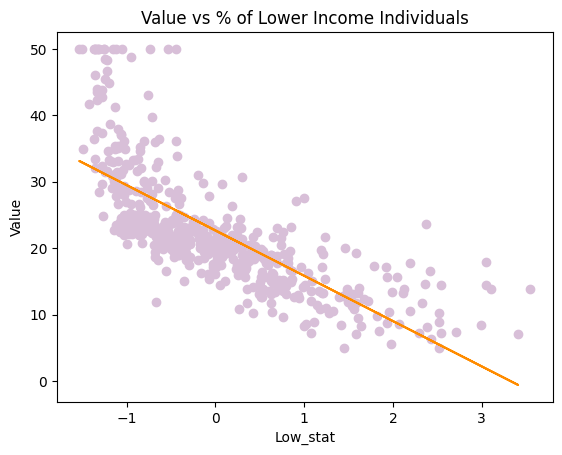

In [19]:
# Model's predictions on training data
y_slr_pred = slr_model.predict(X_train)

# Scatterplot of Value vs Low_stat using original data points (entire dataset)
plt.scatter(X, y, color = 'thistle')

# Line of best fit plot
plt.plot(X_train, y_slr_pred, color = 'darkorange')

plt.title('Value vs % of Lower Income Individuals')
plt.xlabel('Low_stat')
plt.ylabel('Value')
plt.show()

## SLR Model Evaluation

First, we use our model to make predictions.

In [20]:
# Use the linear regression model to make predictions on the test data
y_pred = slr_model.predict(X_test)

After we have our predicitions, we can obtain some performance metrics.

In [21]:
# Calculate R-squared
R_sq = r2_score(y_test, y_pred)
print("R-squared is ", round(R_sq*100), "%")

R-squared is  43 %


In [22]:
# the average absolute difference between the predicted values and the actual values.
MAE = mean_absolute_error(y_test, y_pred)
MAE

4.8640105616698

## Building the Multiple Linear Regression Model

As we saw in the heatmap and scatterplots, two variables in our dataset have strong correlations with the target variable: `Low_stat` and `Avg_room_num`. We will combine these two predictors in a **multiple linear regression** model and see if this improves overall model performance.

In [23]:
# Independent variables
X_mlr = scaled_df[['Avg_room_num', 'Low_stat']]
X_mlr.shape

(506, 2)

In [24]:
# Split the data into training (80%) and testing (20%) data subsets
X_mlr_train, X_mlr_test, y_mlr_train, y_mlr_test = train_test_split(X_mlr, y, test_size=0.2, random_state=0)

In [25]:
# create an empty linear regression model like below and give it a good variable name
mlr_model = LinearRegression()

# to create the model, we use fit(x,y)
mlr_model.fit(X_mlr_train,y_mlr_train)

LinearRegression()

In [26]:
# Use the linear regression model to make predictions on the test data
y_mlr_pred = mlr_model.predict(X_mlr_test)

In [27]:
# Calculate R-squared
R_sq = r2_score(y_test, y_mlr_pred)
print("R-squared is ", round(R_sq*100), "%")

R-squared is  54 %


In [29]:
# the average absolute difference between the predicted values and the actual values.
MAE = mean_absolute_error(y_test, y_mlr_pred)
MAE

4.142444656238559

When we had one predictor in the model, `Low_stat`, the R-squared value was 43% and the MAE was 4.86. Adding a second predictor, `Avg_room_num`, increased R-squared to 54% and lowered the MAE to 4.14. This significant increase in R-squared and decrease in MAE indicates that the model performs better with both predictors compared to just one.

In modeling, we often add predictors one by one and evaluate the performance to see if each additional predictor provides a significant improvement. This process is called **stepwise regression**.

**Task:** Add the `crime_rate` variable to the model and evaluate whether it makes a significant contribution to overall performance.

## Using the Model to Make Predictions

Let us use our model to predict the median value of two houses.

- **House 1:** 8 rooms and 20% of the people in the area are lower income earners.
- **House 2:** 3 rooms and 2% of the people in the area are lower income earners.




To make predictions with the trained Multiple Linear Regression model, we'll need to standardise the input values (for House 1 and House 2) using the same scaling parameters that we used during training. Since we standardised the features before training, we should use the same `StandardScaler` instance that was used to scale the training data for the new inputs.

In [30]:
# We need to create a dataframe with the same columns in the EXACT order as the training data we passed to the StandardScaler instance when we created it
# ('Crime_rate', 'Avg_room_num', 'Low_stat')

new_data = pd.DataFrame({
    'Crime_rate': [0, 0],     # our mlr does not take crime_rate inputs, set to zero
    'Avg_room_num': [8, 3],   # House 1: 8 rooms, House 2: 3 rooms
    'Low_stat': [20, 2]       # For House 1: 20% of lower-income people, House 2: 2%
})

# Standardise the new data using the same scaler (fit_transform was used during training)
new_data_scaled = scaler.transform(new_data)

# Convert the scaled data back to a DataFrame
new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data.columns)

# Drop 'Crime_rate' column because mlr model does not expect a third feature
new_data_scaled = new_data_scaled.drop(columns = ['Crime_rate'])

new_data_scaled

,Avg_room_num,Low_stat
0,2.443811,1.029848
1,-4.679483,-1.493280


In [32]:
# Now we can use the trained model to make predictions
predictions = mlr_model.predict(new_data_scaled)

predictions


array([26.51104314, 12.75477911])

House 1 is predicted to cost \$26,511 and house 2 is predicted to cost \$12,754.

**Important note:** Results may vary when you re-run the cells because of the randomisation of the data splitting process.